This is my first EDA in python. For now, this file is not intended to be
a publication of the results, buth rather a notebook for testing code in
an organised way. 

# Loading and translating data

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

ex_rows = pd.read_csv("/mnt/teodoro/Code/R/projects/INEGI-exportacion/exportations_activity_rows.csv")
ex_cols = pd.read_csv("/mnt/teodoro/Code/R/projects/INEGI-exportacion/exportations_activity_cols.csv")

## Spanish names in a vector
categorias = pd.Series(pd.read_csv("/mnt/teodoro/Code/R/projects/INEGI-exportacion/exportations_activity_cols.csv")
                       .columns.values[2:27])

## Shorter equivalents in English
activities_en = pd.Series(["Total", "Food", "Drinks and tobacco",
                           "Textiles", "Textile products", "Tailoring",
                           "Paper", "Chemistry", "Plastic",
                           "Minerals based", "Metal industry",
                           "Metal products","Machinery", "Electronics",
                           "Transport equipment", "Furniture",
                           "Other manufactures","Not specified", "Mining",
                           "Leather", "Wood","Printing","Electricity",
                           "Petroleum", "Petroleum products"])

## Change column names 2:27
ex_cols.columns = pd.Series(['state','year']).append(activities_en)
list(ex_cols.columns.values)

['state',
 'year',
 'Total',
 'Food',
 'Drinks and tobacco',
 'Textiles',
 'Textile products',
 'Tailoring',
 'Paper',
 'Chemistry',
 'Plastic',
 'Minerals based',
 'Metal industry',
 'Metal products',
 'Machinery',
 'Electronics',
 'Transport equipment',
 'Furniture',
 'Other manufactures',
 'Not specified',
 'Mining',
 'Leather',
 'Wood',
 'Printing',
 'Electricity',
 'Petroleum',
 'Petroleum products']

Function to translate in the rows data frame

In [3]:
def translate (vector_es):
    vector_en = []
    for i in range(len(vector_es)):
        vector_en.append(equivalent(vector_es[i]))
        ## Need to define equivalent 
    return(vector_en)

def equivalent(expression_es):
    position = list(categorias[categorias == expression_es].index)
    ## Match expression_es in the list categorias
    expression_en = activities_en[position[0]]
    return(expression_en)

## Testing

#translate(categorias)
#translate(['Exportaciones totales', 'Industria alimentaria',
#           'Industria química'])
equivalent("Impresión e industrias conexas")

'Printing'

Now we just need to change the values in the data frame

In [4]:
ex_rows = ex_rows.assign(Activity = translate(ex_rows['Descripción']))

ex_rows.head()

,Código,Descripción,state,year,USD,Activity
0,NaN,Exportaciones totales,Aguascalientes,2007,4389841,Total
1,NaN,Exportaciones totales,Aguascalientes,2008,4456893,Total
2,NaN,Exportaciones totales,Aguascalientes,2009,3951108,Total
3,NaN,Exportaciones totales,Aguascalientes,2010,5647929,Total
4,NaN,Exportaciones totales,Aguascalientes,2011,6051640,Total


In [ ]:
# EDA

To start with the EDA, let’s look at the totals by state, using 
`export.cols`

In [5]:
(ex_rows.query('Activity == "Total"')
 .groupby('state')
 .agg({'USD':'sum'}).
 sort_values('USD', ascending=False))

(ex_cols.groupby('state')
 .agg({'Total':'sum'})
 .sort_values('Total', ascending=False))

,Total
state,
Chihuahua,466861927
Baja California,398935507
Coahuila de Zaragoza,355638907
Nuevo León,330267052
Tamaulipas,284435973
Campeche,264100465
Jalisco,213931233
México,188357470
Sonora,179661021


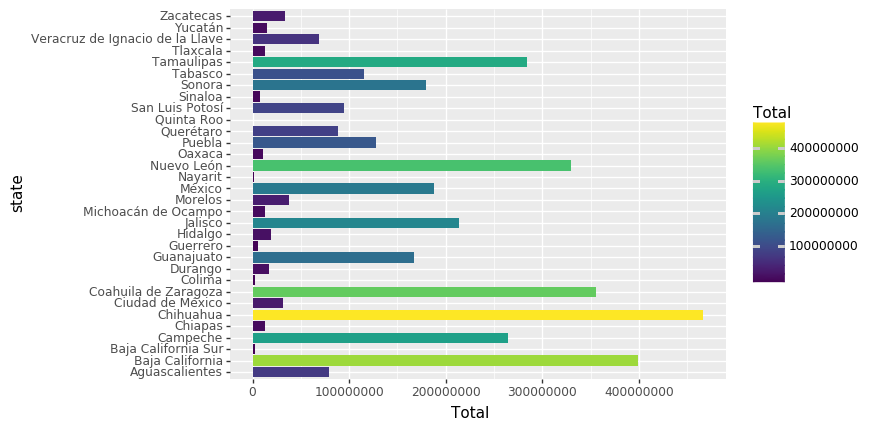

<ggplot: (-9223363256896927523)>

In [13]:
main_states = (ex_cols.groupby('state')
               .agg({'Total':'sum'})
               .sort_values('Total', ascending=False)
               .reset_index())
  
ggplot(main_states) \
    + geom_bar(aes('state', 'Total', fill = 'Total'), stat = 'identity') \
    + coord_flip()

Now the main categories

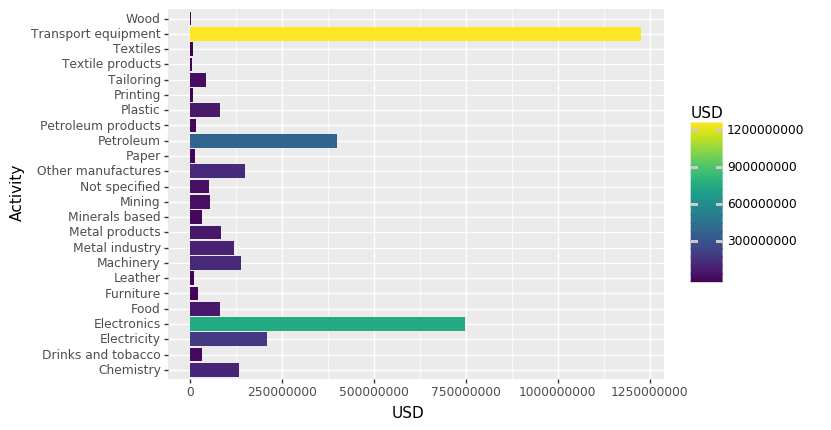

<ggplot: (8779957706290)>

In [14]:
main_act = ex_rows.query('Activity != "Total"').\
    groupby('Activity').agg({'USD':'sum'}).\
    sort_values('USD', ascending=False).\
    reset_index()

ggplot(main_act) \
    + geom_bar(aes('Activity', 'USD', fill = 'USD'), stat = 'identity') \
    + coord_flip()
